# Haber Sınıflandırma Örneği - Reuters
### Şimdi aynı örneğin katman ve birim sayısını değiştirerek deneyelim.

In [1]:
## Veri Setini Yükleyelim

from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
  ## Bağımsız Değişken ( data ) Verisini Hazırlayalım

  import numpy as np

  def VectorizeSequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
      results[i,sequence] = 1
    return results

  x_train = VectorizeSequences(train_data)
  x_test = VectorizeSequences(test_data)

In [ ]:
## Bağımlı Değişken ( labels ) Verisini Hazırlayalım

from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
## Ağımızı İnşa Edelim

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape = (10000,)))
model.add(layers.Dense(64,activation="relu"))
## model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))

In [ ]:
## Ağımızı Derleyelim

model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
## Doğrulama için pay bırakma işlemi

x_validation = x_train[:1000]
partial_x_train = x_train[1000:]

y_validation = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
## Modeli Eğitmek

results = model.fit(partial_x_train,
                    partial_y_train,epochs = 20,
                    batch_size = 512,
                    validation_data = (x_validation,y_validation))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 0.1113 - accuracy: 0.9575 - val_loss: 1.0461 - val_accuracy: 0.8070
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 0.1075 - accuracy: 0.9580 - val_loss: 1.1473 - val_accuracy: 0.7910
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1090 - accuracy: 0.9570 - val_loss: 1.1152 - val_accuracy: 0.8030
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.0997 - accuracy: 0.9585 - val_loss: 1.0838 - val_accuracy: 0.7990
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.1058 - accuracy: 0.9557 - val_loss: 1.1228 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.1050 - accuracy: 0.9563 - val_loss: 1.1299 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1003 - accuracy: 0.9570 - val_loss: 1.2193 - val_accuracy: 0.7950
Epoch 8/20
16

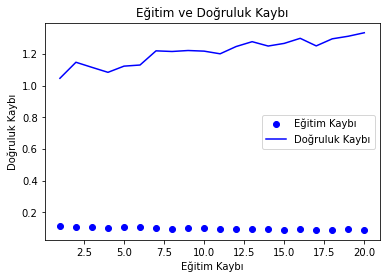

In [ ]:
## Eğitim ve Doğruluk Kayıplarını Görselleştirelim

import matplotlib.pyplot as plt

loss = results.history["loss"]
val_loss = results.history["val_loss"]

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,"bo",label = "Eğitim Kaybı")
plt.plot(epochs,val_loss,"b",label = "Doğruluk Kaybı")
plt.title("Eğitim ve Doğruluk Kaybı")
plt.xlabel("Eğitim Kaybı")
plt.ylabel("Doğruluk Kaybı")
plt.legend()
plt.show()

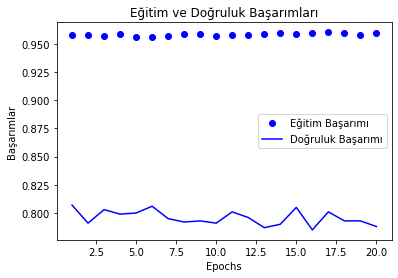

In [ ]:
## Eğitim ve Doğruluk Başarımı

acc = results.history["accuracy"]
val_acc = results.history["val_accuracy"]

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,"bo",label = "Eğitim Başarımı")
plt.plot(epochs,val_acc,"b",label = "Doğruluk Başarımı")
plt.title("Eğitim ve Doğruluk Başarımları")
plt.xlabel("Epochs")
plt.ylabel("Başarımlar")
plt.legend()
plt.show()
